In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [223]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
sample= pd.read_csv('sample_submission.csv')

In [224]:
sample.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [225]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [226]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [227]:
df= train.copy()

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [229]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [230]:
df.duplicated().sum()

0

In [231]:
df.shape

(165034, 14)

In [232]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

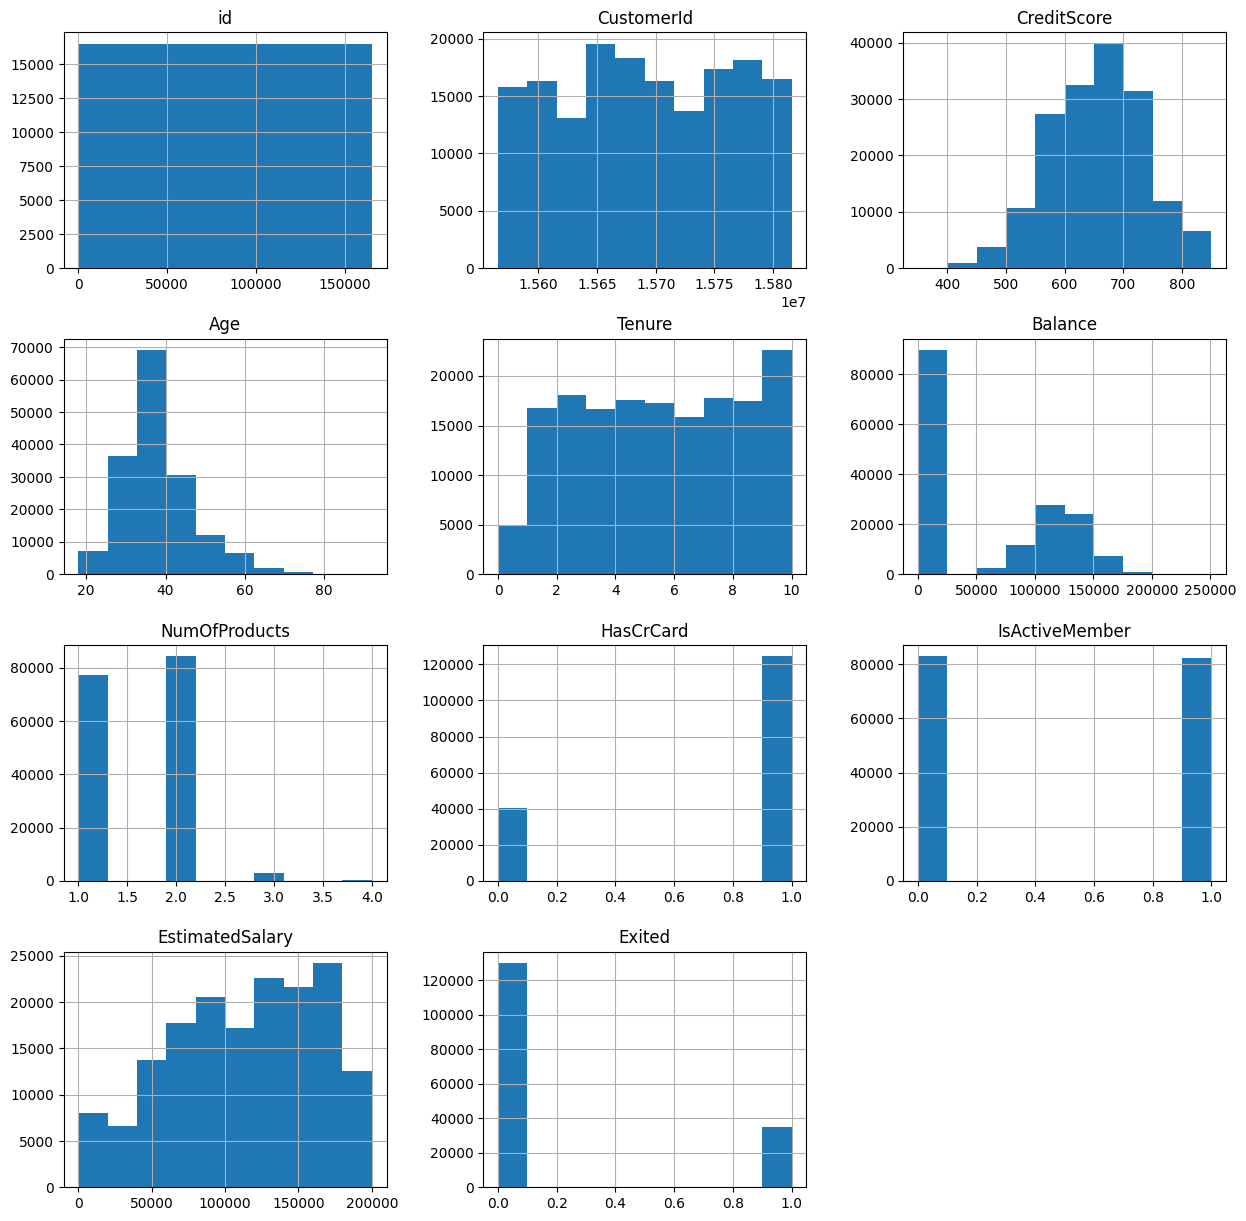

In [233]:
df.hist(figsize=(15,15))

In [234]:
df.drop(columns=['id', 'CustomerId', 'Surname'], inplace=True)
test.drop(columns=['id', 'CustomerId', 'Surname'], inplace=True)

In [235]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [236]:
print(df['Geography'].unique())
print(df['Gender'].unique())

['France' 'Spain' 'Germany']
['Male' 'Female']


In [237]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [238]:
#df['Exited'].sum()

<Axes: >

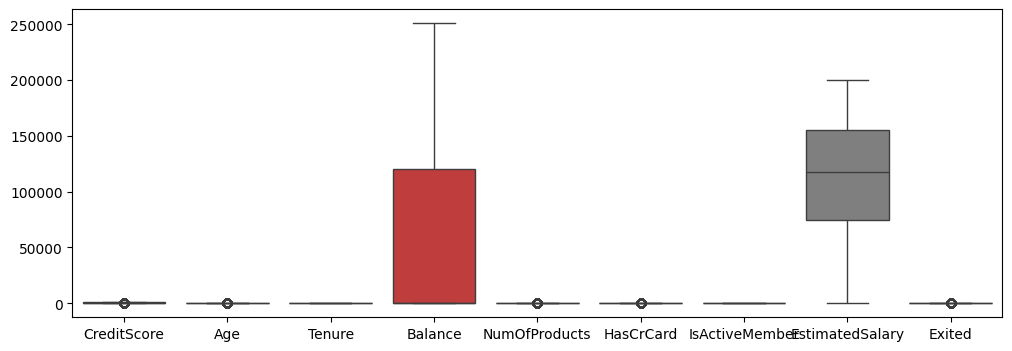

In [239]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df.select_dtypes(include='number'))

Text(0.5, 1.0, 'Age distribution')

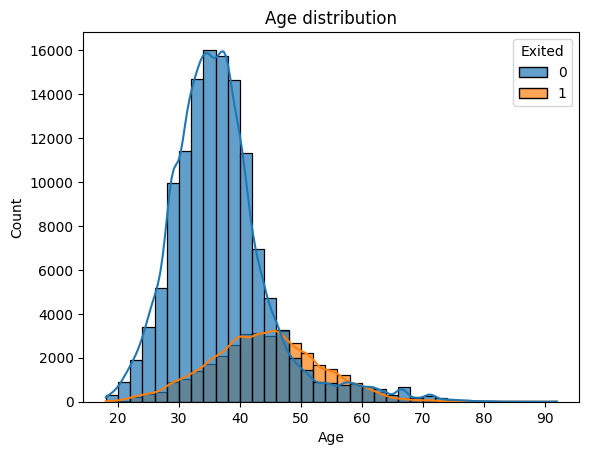

In [240]:
sns.histplot(data=df, x='Age', hue='Exited', binwidth=2, alpha=0.7, kde=True)
plt.title('Age distribution')

In [241]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  object 
 2   Gender           110023 non-null  object 
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.4+ MB


In [242]:
encoder= OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value= 10)
df[['Gender', 'Geography']]= encoder.fit_transform(df[['Gender', 'Geography']])
test[['Gender', 'Geography']]= encoder.transform(test[['Gender', 'Geography']])

In [243]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.005379,0.002310,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Geography,0.005379,1.000000,-0.012092,0.034110,0.000276,0.134642,-0.025123,-0.016715,-0.003493,-0.004102,0.053343
Gender,0.002310,-0.012092,1.000000,-0.063139,0.008767,-0.014699,0.026098,0.006418,0.033722,-0.007778,-0.146442
Age,-0.008918,0.034110,-0.063139,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,0.000942,0.000276,0.008767,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.006973,0.134642,-0.014699,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.011361,-0.025123,0.026098,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.002828,-0.016715,0.006418,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.014790,-0.003493,0.033722,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001820,-0.004102,-0.007778,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827


<Axes: >

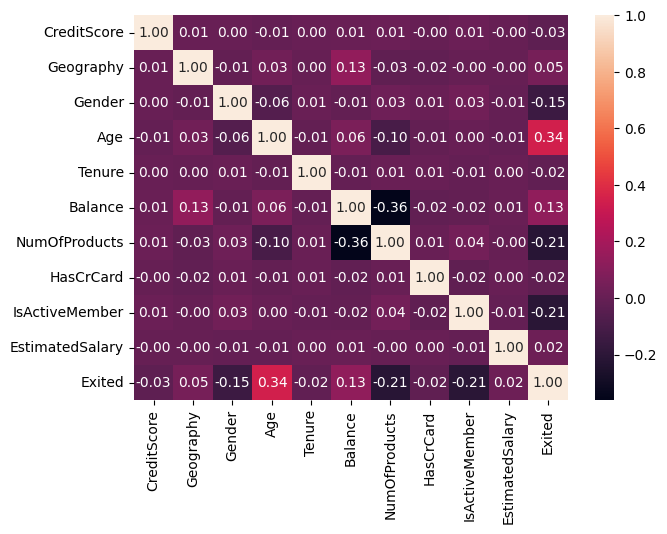

In [244]:
fig, ax= plt.subplots(figsize=(7, 5))
sns.heatmap(df.corr(), fmt='.2f', annot=True)

In [245]:
x= df.drop('Exited', axis= 1)
y= df['Exited']

In [246]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42,
                                                   stratify=y)

In [247]:
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
x_test= scaler.transform(test)

In [248]:
print(y_pred.shape)
print(y_test.shape)

(33007,)
(33007,)


In [252]:
d_t= DecisionTreeClassifier(random_state=42)
d_t.fit(X_train, y_train)
y_pred= d_t.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.7978610597751992
Confusion Matrix:
 [[22544  3479]
 [ 3193  3791]]


In [256]:
l_r = LogisticRegression(max_iter=1000)
l_r= l_r.fit(X_train, y_train)
y_pred= l_r.predict(X_test)

In [257]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8249462235283425
Confusion Matrix:
 [[24852  1171]
 [ 4607  2377]]


In [254]:
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.844123973702548
Confusion Matrix:
 [[24310  1713]
 [ 3432  3552]]


In [221]:
svm= SVC()
svm.fit(X_train, y_train)
y_pred= svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.856545581240343
Confusion Matrix:
 [[25195   828]
 [ 3907  3077]]


In [253]:
r_f= RandomForestClassifier(random_state=42)
r_f.fit(X_train, y_train)
y_pred= r_f.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8575756657678674
Confusion Matrix:
 [[24606  1417]
 [ 3284  3700]]


In [255]:
rg= GradientBoostingClassifier()
rg.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.844123973702548
Confusion Matrix:
 [[24310  1713]
 [ 3432  3552]]


In [258]:
def evaluate_classifiers(X_train, y_train, X_test, y_test):
    # Model isimlerini ve nesnelerini bir listeye koyun
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=10000),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    # Sonuçları saklamak için bir liste oluşturun
    results = []

    # Her bir sınıflandırıcıyı çalıştırın
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Confusion Matrix": confusion
        })

    return pd.DataFrame(results)


In [261]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [262]:
results = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(results)


                    Model  Accuracy               Confusion Matrix
0           Decision Tree  0.798146  [[33932, 5201], [4793, 5585]]
1     Logistic Regression  0.787562  [[37709, 1424], [9094, 1284]]
2     K-Nearest Neighbors  0.757064  [[36326, 2807], [9221, 1157]]
3  Support Vector Machine  0.790390       [[39133, 0], [10378, 0]]
4           Random Forest  0.859284  [[36966, 2167], [4800, 5578]]
5       Gradient Boosting  0.864656  [[37287, 1846], [4855, 5523]]


In [270]:
rg= GradientBoostingClassifier()
rg.fit(X_train, y_train)
y_pred= rg.predict(x_test)

In [288]:
print(y_pred[:851])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [272]:
sample.drop('Exited', axis= 1, inplace=True)
sample.head()

,id
0,165034
1,165035
2,165036
3,165037
4,165038


In [273]:
sample['Exited']= y_pred